# Install dependencies

In [ ]:
!pip install easyocr
!pip install imutils

In [ ]:
!pip uninstall opencv-python-headless 
!pip install opencv-python-headless==4.1.2.30

# Importing libraries

In [6]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# Read Image & Grayscale 

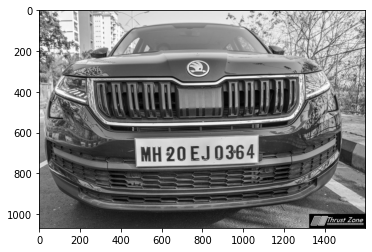

In [27]:
img = cv2.imread('/content/car_plate.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
# plt.imshow(gray)

# Finding Edges

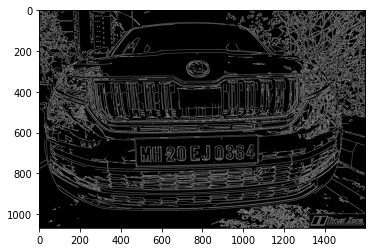

In [28]:
# A bilateral filter is used for smoothening images and reducing noise, while preserving edges.
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction

# Canny Edge Detection is used to detect the edges in an image. It accepts a gray scale image as input and it uses a multistage algorithm.
edged = cv2.Canny(bfilter, 30, 200) #Edge detection

plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# Finding contours

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.

See, there are three arguments in cv.findContours() function, first one is source image, second is contour retrieval mode, third is contour approximation method. And it outputs the contours and hierarchy. Contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.

In [31]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
location

array([[[1075,  611]],

       [[1072,  749]],

       [[ 474,  765]],

       [[ 468,  626]]], dtype=int32)

# Working of approxPolyDP() function in OpenCV
## Summary

The process of approximating the shape of a contour of a given polygon to the shape of the original polygon to the specified precision is called approximation of a shape of the contour.

We make use of a function in OpenCV called approxPolyDP() function to perform an approximation of a shape of a contour.

The image of a polygon whose shape of a contour must be approximated is read using the imread() function.

Then the input image is converted into a grayscale image.

Then thresholding function is applied on the grayscale image to convert it into a binary image.

Then the contours present in the image are determined using findContours() function.

Then for each of the contours determined in the image, the approxPolyDP() function is applied to determine the shape of the polygons present in the image.

Then the determined shape of the contours is drawn on the image using drawContours() function and then displayed as the output of the program.

# Drawing contours
To draw the contours, cv.drawContours function is used. It can also be used to draw any shape provided you have its boundary points. Its first argument is source image, second argument is the contours which should be passed as a Python list, third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) and remaining arguments are color, thickness etc.

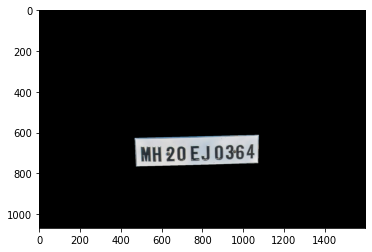

In [32]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

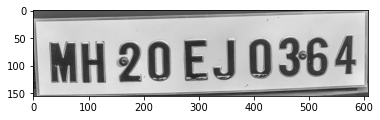

In [33]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# Use Easy OCR To Read Text and display result

In [34]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result
text = result[0][-2]
text = text.replace(" ","")
print("Car number: ",text)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Car number:  MH20EJ0364
